In [2]:
import numpy as np
import scipy.stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


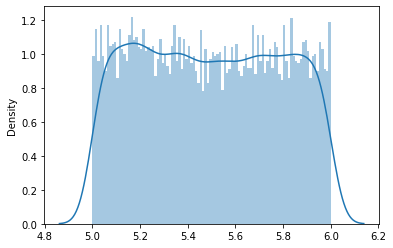

In [6]:
uniform_data = scipy.stats.uniform.rvs(loc=5, scale= 1, size=10000)

ax = sns.distplot(
    uniform_data,
    bins=100,
    kde=True
)

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


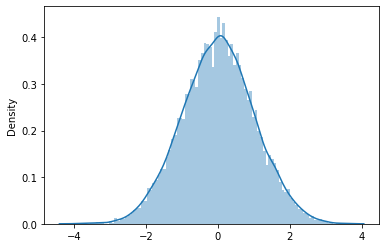

In [7]:
normal_distribution = scipy.stats.norm.rvs(loc=0, scale=1, size=10000)

ax = sns.distplot(
    normal_distribution,
    bins=100,
    kde=True
)

In [17]:
uniform_data = scipy.stats.uniform.rvs(loc=0, scale= 1, size=500)

In [18]:
np.mean(uniform_data)

0.4981456978906336

CI 95%
mean +- standard error

0.529 +- 0.05

In [19]:
means_of_means = []
for experiment in range(1000):
    resampled = np.random.choice(uniform_data, size=len(uniform_data), replace=True)
    means_of_means.append(np.mean(resampled))

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


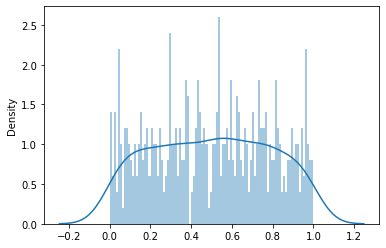

In [20]:
ax = sns.distplot(
    uniform_data,
    bins=100,
    kde=True
)

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


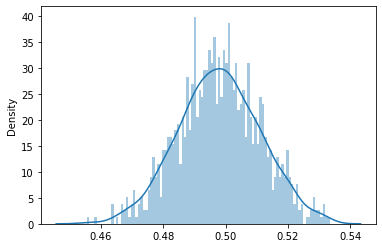

In [21]:
ax = sns.distplot(
    means_of_means,
    bins=100,
    kde=True
)

In [22]:
lower_bound = np.quantile(means_of_means, 0.025)
upper_bound = np.quantile(means_of_means, 0.975)

print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (0.4721507581120658, 0.5230783053038599)


In [23]:
estimated_mean = np.mean(means_of_means)
sample_std = np.std(means_of_means)

lower_bound = estimated_mean - 1.96*sample_std
upper_bound = estimated_mean + 1.96*sample_std
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (0.47237735892394145, 0.5236220770412646)


In [24]:
def standard_error_of_mean(data):
    s = np.std(data)
    nobs = len(data)
    return s/(nobs**0.5)

In [25]:
se = standard_error_of_mean(uniform_data)
m = np.mean(uniform_data)

lower_bound = m - 1.96*se
upper_bound = m + 1.96*se
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (0.4731293038199469, 0.5231620919613204)


In [27]:
import pandas as pd
data = pd.read_csv("data/heart.csv")

In [28]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
data['Sex_Category'] = data.sex.replace({1:"Male", 0:"Female"})

In [32]:
pd.crosstab(data.target, data.Sex_Category)

Sex_Category,Female,Male
target,,
0,86,413
1,226,300


In [33]:
p_fm = 226/(226+86)
n_fm = 226+86

In [34]:
p_fm

0.7243589743589743

In [35]:
se_fm = (p_fm*(1-p_fm)/n_fm)**0.5

In [36]:
se_fm

0.02529714756803247

In [37]:
lower_bound = p_fm - 1.96*se_fm
upper_bound = p_fm + 1.96*se_fm

print("95% CI of Population Proportion: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Proportion: (0.6747765651256307, 0.773941383592318)


In [43]:
sample = data.query("sex == 0")['target'].values

In [44]:
np.mean(sample)

0.7243589743589743

In [45]:
means_of_means = []
for experiment in range(1000):
    resampled = np.random.choice(sample, size=len(sample), replace=True)
    means_of_means.append(np.mean(resampled))

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


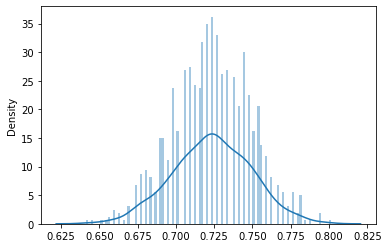

In [46]:
ax = sns.distplot(
    means_of_means,
    bins=100,
    kde=True
)

In [47]:
lower_bound = np.quantile(means_of_means, 0.025)
upper_bound = np.quantile(means_of_means, 0.975)

print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (0.6730769230769231, 0.7756410256410257)


Hipotesis Testing

In [49]:
import statsmodels.api as sm

Survey ke 1018 Orang Tua, tentang gadget dan kekurangan tidur pada remaja
56% percaya itu penybabnya

tahun lalu angkanya 52% 

Apakah terjadi peningkatan jumlah orang tua percaya terhadap hal tsb

H0: p = 0.52
H1: p > 0.52

ztest

alpha = 0.05 --> 95% Confindence terhadap temuan kita

p-value > alpha --> Fail to reject H0

p-value <= alpha --> Reject H0

In [48]:
n_obs = 1018
pnull = 0.52
pnew=0.56

In [50]:
p_val = sm.stats.proportions_ztest(pnew*n_obs, nobs=n_obs, value=pnull, alternative='larger')

In [53]:
p_val[1]

0.005069273865860533

In [54]:
data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv")


Apakah BMI female vs male?

H0: BMI Male = BMI Female

H1: BMI Male != BMI Female


ztest 

alpha = 0.05

In [58]:
females = data[data['RIAGENDR'] == 2]
males = data[data['RIAGENDR'] == 1]

In [62]:
nf = len(females)
meanf = females['BMXBMI'].mean()
stdf = females['BMXBMI'].std()

print(nf,meanf,stdf)

nm = len(males)
meanm = males['BMXBMI'].mean()
stdm = males['BMXBMI'].std()

print(nm,meanm,stdm)


2976 29.939945652173996 7.75331880954568
2759 28.778072111846985 6.252567616801485


In [64]:
z_stat, p_val = sm.stats.ztest(females['BMXBMI'].dropna(), males['BMXBMI'].dropna(), alternative='two-sided')

In [65]:
p_val < 0.05

True

/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yjhouma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


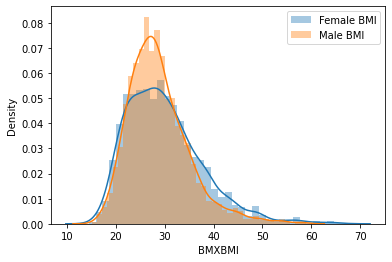

In [66]:
sns.distplot(females['BMXBMI'].dropna(), label="Female BMI")
sns.distplot(males['BMXBMI'].dropna(), label="Male BMI")
plt.legend()

In [67]:
sm.stats.ttest_ind(females['BMXBMI'].dropna(), males['BMXBMI'].dropna(), alternative='two-sided')

(6.175593353138303, 7.050275578095374e-10, 5660.0)

In [90]:
sample1 = scipy.stats.norm.rvs(loc=0.1, scale=1, size=100)
sample2 = scipy.stats.norm.rvs(loc=0.6, scale=2, size=100)

p_val = sm.stats.ttest_ind(sample1, sample2, alternative='two-sided')[1]

if p_val > 0.05:
    print("Probably same distribution")
else:
    print("Probably different distribution")

Probably different distribution


In [93]:
data = [
    [86,413],
    [226,300]
    ]

In [97]:
p_val = scipy.stats.chi2_contingency(data)[1]

In [98]:
if p_val > 0.05:
    print("Probably Indipendent")
else:
    print("Probably Dependent")

Probably Dependent
